#Imports

In [608]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
from sklearn.model_selection import train_test_split

In [609]:
hr1 = pd.read_csv('/content/a-z.csv')
hr1.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [610]:
hr1.shape

(2790, 785)

In [611]:
hr1.dtypes

0        int64
0.1      int64
0.2      int64
0.3      int64
0.4      int64
         ...  
0.644    int64
0.645    int64
0.646    int64
0.647    int64
0.648    int64
Length: 785, dtype: object

In [612]:
hr1.describe

<bound method NDFrame.describe of        0  0.1  0.2  0.3  0.4  0.5  ...  0.643  0.644  0.645  0.646  0.647  0.648
0      0    0    0    0    0    0  ...      0      0      0      0      0      0
1      0    0    0    0    0    0  ...      0      0      0      0      0      0
2      0    0    0    0    0    0  ...      0      0      0      0      0      0
3      0    0    0    0    0    0  ...      0      0      0      0      0      0
4      0    0    0    0    0    0  ...      0      0      0      0      0      0
...   ..  ...  ...  ...  ...  ...  ...    ...    ...    ...    ...    ...    ...
2785  25    0    0    0    0    0  ...      0      0      0      0      0      0
2786  25    0    0    0    0    0  ...      0      0      0      0      0      0
2787  25    0    0    0    0    0  ...      0      0      0      0      0      0
2788  25    0    0    0    0    0  ...      0      0      0      0      0      0
2789  25    0    0    0    0    0  ...      0      0      0      0      0  

In [613]:
hr1.isnull().sum().head()

0      0
0.1    0
0.2    0
0.3    0
0.4    0
dtype: int64

#Data Preprocessing

In [614]:
hr1 = hr1.rename(columns={'0':'labels'})
hr1.head()

,labels,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [615]:
x = hr1.drop(['labels'],axis=1)
x.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [616]:
y = hr1['labels']
y.tail()

2785    25
2786    25
2787    25
2788    25
2789    25
Name: labels, dtype: int64

##Normalization and Data Split

In [617]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [618]:
#x_train = np.expand_dims(x_train,-1)
#x_test = np.expand_dims(x_test,-1)


In [619]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3)

In [620]:
def labeler(y_pr):
  from operator import invert
  data = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
  values = np.array(data)
  label_encoder = LabelEncoder()
  intger_encoder = label_encoder.fit_transform(values)
  intger_encoder = intger_encoder.reshape(len(intger_encoder),1)
  inverted = label_encoder.inverse_transform([np.argmax(intger_encoder[:y_pr])])
  return inverted

In [621]:
labeler(5)

array(['E'], dtype='<U1')

In [622]:
x_train.shape

(1953, 784)

#EDA

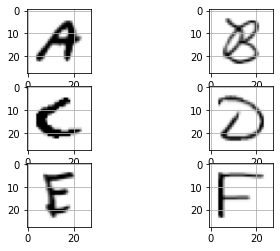

In [623]:
plt.subplot(3,2,1)
plt.grid(True)
plt.imshow(x.iloc[18].values.reshape(28,28),cmap='Greys')
plt.subplot(3,2,2)
plt.grid(True)
plt.imshow(x.iloc[21].values.reshape(28,28),cmap='Greys')
plt.subplot(3,2,3)
plt.grid(True)
plt.imshow(x.iloc[42].values.reshape(28,28),cmap='Greys')
plt.subplot(3,2,4)
plt.grid(True)
plt.imshow(x.iloc[67].values.reshape(28,28),cmap='Greys')
plt.subplot(3,2,5)
plt.grid(True)
plt.imshow(x.iloc[88].values.reshape(28,28),cmap='Greys')
plt.subplot(3,2,6)
plt.grid(True)
plt.imshow(x.iloc[102].values.reshape(28,28),cmap='Greys')
plt.show()  

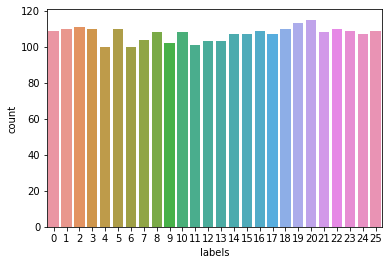

In [624]:
sns.countplot(hr1['labels'])

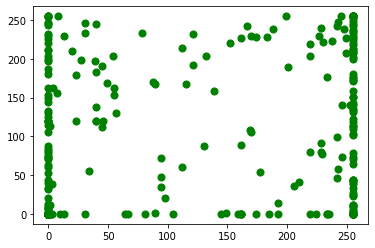

In [625]:
plt.scatter(x.iloc[0],x.iloc[30], s = 50,c = 'g')
plt.show()

#Model

In [626]:
import cv2 as cv
from google.colab.patches import cv2_imshow

In [627]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report,accuracy_score

In [628]:
model_res={}

##KNN

In [629]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import mean_squared_error as mse

In [630]:
m = knn(6)
m.fit(x_train,y_train)
y_hat = m.predict(x_test)

In [631]:
model_res['KNN'] = accuracy_score(y_test, y_hat)

In [632]:
print(multilabel_confusion_matrix(y_test,y_hat))

[[[789   4]
  [ 10  34]]

 [[811   3]
  [  7  16]]

 [[778  15]
  [  3  41]]

 [[804   8]
  [  7  18]]

 [[786  13]
  [  8  30]]

 [[800  13]
  [  0  24]]

 [[800   6]
  [ 11  20]]

 [[802  11]
  [  5  19]]

 [[795  11]
  [  7  24]]

 [[792  16]
  [ 10  19]]

 [[799   8]
  [  7  23]]

 [[800  10]
  [  4  23]]

 [[802   4]
  [  0  31]]

 [[799   3]
  [ 11  24]]

 [[789  15]
  [  5  28]]

 [[804   4]
  [  7  22]]

 [[806   0]
  [ 12  19]]

 [[809   2]
  [ 14  12]]

 [[799   1]
  [  7  30]]

 [[792  11]
  [  8  26]]

 [[801   4]
  [ 15  17]]

 [[791   4]
  [  0  42]]

 [[796   6]
  [  4  31]]

 [[798   7]
  [ 12  20]]

 [[790   9]
  [  9  29]]

 [[805   0]
  [  5  27]]]


In [633]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        44
           1       0.84      0.70      0.76        23
           2       0.73      0.93      0.82        44
           3       0.69      0.72      0.71        25
           4       0.70      0.79      0.74        38
           5       0.65      1.00      0.79        24
           6       0.77      0.65      0.70        31
           7       0.63      0.79      0.70        24
           8       0.69      0.77      0.73        31
           9       0.54      0.66      0.59        29
          10       0.74      0.77      0.75        30
          11       0.70      0.85      0.77        27
          12       0.89      1.00      0.94        31
          13       0.89      0.69      0.77        35
          14       0.65      0.85      0.74        33
          15       0.85      0.76      0.80        29
          16       1.00      0.61      0.76        31
          17       0.86    

####Hyperparameter Tuning

In [634]:
for i in range(1,100):
  model = knn(i)
  model.fit(x_train, y_train)
  y_cap = model.predict(x_test)
  error = mse(y_test, y_cap, squared = False)
  print("{} error for k = {}".format(error,i))


4.621129592391607 error for k = 1
4.691689187414515 error for k = 2
4.447221354708778 error for k = 3
4.425812198915775 error for k = 4
4.454334873320573 error for k = 5
4.613884815899147 error for k = 6
4.608443759330819 error for k = 7
4.7270795174859925 error for k = 8
4.580228664996532 error for k = 9
4.6390632680293304 error for k = 10
4.702245326555294 error for k = 11
4.685573578661568 error for k = 12
4.78273477953003 error for k = 13
4.759195337748125 error for k = 14
4.846878806990487 error for k = 15
4.697542508087895 error for k = 16
4.77973619943619 error for k = 17
4.759697389053677 error for k = 18
4.7689758048244695 error for k = 19
4.805413116582952 error for k = 20
4.7922179050230405 error for k = 21
4.8771037491209235 error for k = 22
4.8627518992287495 error for k = 23
4.899345285789795 error for k = 24
4.844659822248559 error for k = 25
4.846015989216496 error for k = 26
4.7472560143173155 error for k = 27
4.79832208825174 error for k = 28
4.81261782428032 error fo

##Naive Bayes

###Multinomial Naive Bayes

In [635]:
from sklearn.naive_bayes import MultinomialNB

In [636]:
cl = MultinomialNB()
cl.fit(x_train,y_train)
y_hat = cl.predict(x_test)
cl.score(x_test,y_test)

0.7132616487455197

In [637]:
model_res['MultinomialNB'] = accuracy_score(y_test,y_hat)

In [638]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        44
           1       0.41      0.61      0.49        23
           2       0.87      0.77      0.82        44
           3       0.64      0.72      0.68        25
           4       0.53      0.47      0.50        38
           5       0.85      0.96      0.90        24
           6       0.81      0.81      0.81        31
           7       0.62      0.62      0.62        24
           8       0.76      0.84      0.80        31
           9       0.74      0.48      0.58        29
          10       0.58      0.63      0.60        30
          11       0.62      0.67      0.64        27
          12       0.62      0.97      0.76        31
          13       0.54      0.60      0.57        35
          14       0.66      0.76      0.70        33
          15       0.90      0.90      0.90        29
          16       0.79      0.74      0.77        31
          17       0.39    

###Gaussian Naive Bayes

In [639]:
from sklearn.naive_bayes import GaussianNB

In [640]:
cl1 = GaussianNB()
cl1.fit(x_train,y_train)
y_h = cl1.predict(x_test)
cl1.score(x_test,y_test)

0.5519713261648745

In [641]:
model_res['GaussianNB'] = accuracy_score(y_test,y_h)

In [642]:
print(classification_report(y_test,y_h))

              precision    recall  f1-score   support

           0       0.66      0.57      0.61        44
           1       0.54      0.30      0.39        23
           2       0.93      0.32      0.47        44
           3       0.60      0.36      0.45        25
           4       0.75      0.16      0.26        38
           5       0.72      0.88      0.79        24
           6       0.88      0.68      0.76        31
           7       0.50      0.21      0.29        24
           8       0.72      0.74      0.73        31
           9       0.33      0.03      0.06        29
          10       0.57      0.57      0.57        30
          11       0.35      0.63      0.45        27
          12       0.68      0.90      0.78        31
          13       0.50      0.20      0.29        35
          14       0.49      0.82      0.61        33
          15       0.27      0.90      0.41        29
          16       0.45      0.61      0.52        31
          17       0.46    

##SVM

###Liner

In [643]:
import warnings
warnings.filterwarnings('ignore')

In [644]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train,y_train)
y_cap = classifier.predict(x_test)
classifier.score(x_test,y_test)

0.8207885304659498

In [645]:
model_res['Linear SVM'] = accuracy_score(y_test,y_cap)

In [646]:
classifier.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [647]:
print(multilabel_confusion_matrix(y_test,y_cap))

[[[782  11]
  [  8  36]]

 [[804  10]
  [  6  17]]

 [[788   5]
  [  4  40]]

 [[806   6]
  [  6  19]]

 [[795   4]
  [ 14  24]]

 [[807   6]
  [  0  24]]

 [[801   5]
  [  5  26]]

 [[804   9]
  [  4  20]]

 [[802   4]
  [  5  26]]

 [[796  12]
  [  6  23]]

 [[795  12]
  [  7  23]]

 [[804   6]
  [  0  27]]

 [[803   3]
  [  1  30]]

 [[793   9]
  [  7  28]]

 [[794  10]
  [  6  27]]

 [[805   3]
  [  6  23]]

 [[805   1]
  [  5  26]]

 [[805   6]
  [ 13  13]]

 [[798   2]
  [  8  29]]

 [[799   4]
  [  4  30]]

 [[799   6]
  [ 10  22]]

 [[790   5]
  [  1  41]]

 [[799   3]
  [  5  30]]

 [[800   5]
  [  5  27]]

 [[796   3]
  [ 10  28]]

 [[805   0]
  [  4  28]]]


In [648]:
print(classification_report(y_test,y_cap))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        44
           1       0.63      0.74      0.68        23
           2       0.89      0.91      0.90        44
           3       0.76      0.76      0.76        25
           4       0.86      0.63      0.73        38
           5       0.80      1.00      0.89        24
           6       0.84      0.84      0.84        31
           7       0.69      0.83      0.75        24
           8       0.87      0.84      0.85        31
           9       0.66      0.79      0.72        29
          10       0.66      0.77      0.71        30
          11       0.82      1.00      0.90        27
          12       0.91      0.97      0.94        31
          13       0.76      0.80      0.78        35
          14       0.73      0.82      0.77        33
          15       0.88      0.79      0.84        29
          16       0.96      0.84      0.90        31
          17       0.68    

###RBF

In [649]:
classif = SVC(kernel = 'rbf', random_state = 0)
classif.fit(x_train,y_train)
y_c = classif.predict(x_test)

In [650]:
model_res['RBF'] = accuracy_score(y_test, y_c)

In [651]:
classifier.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [652]:
print(multilabel_confusion_matrix(y_test,y_c))

[[[787   6]
  [ 10  34]]

 [[808   6]
  [  4  19]]

 [[791   2]
  [  2  42]]

 [[805   7]
  [  3  22]]

 [[796   3]
  [  9  29]]

 [[809   4]
  [  0  24]]

 [[804   2]
  [  5  26]]

 [[803  10]
  [  0  24]]

 [[803   3]
  [  4  27]]

 [[795  13]
  [  6  23]]

 [[795  12]
  [  7  23]]

 [[804   6]
  [  1  26]]

 [[801   5]
  [  1  30]]

 [[798   4]
  [  9  26]]

 [[796   8]
  [  6  27]]

 [[807   1]
  [  2  27]]

 [[805   1]
  [  3  28]]

 [[807   4]
  [  9  17]]

 [[799   1]
  [  7  30]]

 [[799   4]
  [  5  29]]

 [[803   2]
  [  8  24]]

 [[792   3]
  [  0  42]]

 [[797   5]
  [  3  32]]

 [[802   3]
  [  7  25]]

 [[793   6]
  [  6  32]]

 [[805   0]
  [  4  28]]]


In [653]:
print(classification_report(y_test,y_c))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        44
           1       0.76      0.83      0.79        23
           2       0.95      0.95      0.95        44
           3       0.76      0.88      0.81        25
           4       0.91      0.76      0.83        38
           5       0.86      1.00      0.92        24
           6       0.93      0.84      0.88        31
           7       0.71      1.00      0.83        24
           8       0.90      0.87      0.89        31
           9       0.64      0.79      0.71        29
          10       0.66      0.77      0.71        30
          11       0.81      0.96      0.88        27
          12       0.86      0.97      0.91        31
          13       0.87      0.74      0.80        35
          14       0.77      0.82      0.79        33
          15       0.96      0.93      0.95        29
          16       0.97      0.90      0.93        31
          17       0.81    

In [666]:
pred_val = np.array(x.iloc[300])
pred_val1 = pred_val.reshape(1,-1)
yc = classif.predict(pred_val1)
print(yc)
yc = yc.item()+1
print(yc)

[14]
15


In [667]:
print(labeler(yc))

['O']


###Polynomial SVM

In [670]:
mod = SVC(kernel = 'poly', random_state = 0)
mod.fit(x_train,y_train)
y_capp = mod.predict(x_test)

In [676]:
model_res['Polinomial SVM'] = accuracy_score(y_test,y_capp)

In [671]:
mod.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [672]:
print(multilabel_confusion_matrix(y_test,y_capp))

[[[789   4]
  [ 16  28]]

 [[809   5]
  [  6  17]]

 [[786   7]
  [  7  37]]

 [[810   2]
  [  3  22]]

 [[796   3]
  [ 13  25]]

 [[808   5]
  [  0  24]]

 [[803   3]
  [  9  22]]

 [[805   8]
  [  2  22]]

 [[802   4]
  [  5  26]]

 [[727  81]
  [  5  24]]

 [[796  11]
  [  6  24]]

 [[804   6]
  [  7  20]]

 [[804   2]
  [  3  28]]

 [[795   7]
  [ 11  24]]

 [[798   6]
  [  4  29]]

 [[806   2]
  [  5  24]]

 [[806   0]
  [  7  24]]

 [[808   3]
  [ 11  15]]

 [[800   0]
  [  9  28]]

 [[799   4]
  [  8  26]]

 [[803   2]
  [ 15  17]]

 [[792   3]
  [  0  42]]

 [[796   6]
  [  6  29]]

 [[803   2]
  [ 11  21]]

 [[792   7]
  [  9  29]]

 [[805   0]
  [  5  27]]]


In [675]:
print(classification_report(y_test,y_capp))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74        44
           1       0.77      0.74      0.76        23
           2       0.84      0.84      0.84        44
           3       0.92      0.88      0.90        25
           4       0.89      0.66      0.76        38
           5       0.83      1.00      0.91        24
           6       0.88      0.71      0.79        31
           7       0.73      0.92      0.81        24
           8       0.87      0.84      0.85        31
           9       0.23      0.83      0.36        29
          10       0.69      0.80      0.74        30
          11       0.77      0.74      0.75        27
          12       0.93      0.90      0.92        31
          13       0.77      0.69      0.73        35
          14       0.83      0.88      0.85        33
          15       0.92      0.83      0.87        29
          16       1.00      0.77      0.87        31
          17       0.83    

##K Mean clustering

In [654]:
from sklearn.cluster import MiniBatchKMeans

In [655]:
mbkm = MiniBatchKMeans(n_clusters = 26)
mbkm.fit(x.values)

MiniBatchKMeans(n_clusters=26)

In [656]:
mbkm.cluster_centers_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [657]:
mbkm.get_params()

{'batch_size': 1024,
 'compute_labels': True,
 'init': 'k-means++',
 'init_size': None,
 'max_iter': 100,
 'max_no_improvement': 10,
 'n_clusters': 26,
 'n_init': 3,
 'random_state': None,
 'reassignment_ratio': 0.01,
 'tol': 0.0,
 'verbose': 0}

In [658]:
yca = mbkm.labels_
yca

array([ 0,  4,  9, ..., 13, 13, 13], dtype=int32)

In [659]:
pred_val = np.array(x.iloc[1])
pred_val1 = pred_val.reshape(1,-1)
yc = mbkm.predict(pred_val1)
print(yc)
yc = yc.item()+1
print(yc)

[4]
5


In [660]:
print(labeler(yc))

['E']


#Inference

In [677]:
res = pd.DataFrame(model_res, index=['Accuracy score'])
res.T.sort_values('Accuracy score',ascending=False)

,Accuracy score
RBF,0.855436
Linear SVM,0.820789
Polinomial SVM,0.781362
KNN,0.775388
MultinomialNB,0.713262
GaussianNB,0.551971


From the above accuracy scores rbf SVM is most suitable for classification given supervised learning algorithms(without much data preprocessing).